<a href="https://colab.research.google.com/github/wheemin-2/25-1-ESAA/blob/main/0317_HW_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **비지도 학습**

**군집 (clustering)**
- 비슷한 샘플을 클러스터로 모음

**이상치 탐지 (outlier detection)**
- '정상' 데이터가 어떻게 보이는지 학습한 후 비정상 샘플을 감지하는 데에 사용
- e.g. 제조 라인에서 결함 제품 감지 / 시계열 데이터에서 새로운 경향성 발견

**밀도 추정 (density estimation)**
- 데이터셋 생성 확률 과정(random process)의 PDF 추정
- 이상치 탐지에 널리 사용됨
    - 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높음

## **군집 (clustering)**

**군집의 활용**


1) 고객 분류
- 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터링 가능
- 고객 그룹마다 제품 추천 / 마케팅 전략을 다르게 적용 가능 > **추천 시스템** 생성 가능

2) 데이터 분석
- 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됨

3) 차원 축소 기법
- 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 **친화성 (affinity)** 을 측정할 수 있음

4) 이상치 탐지
- 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성 ↑
- 제조 분야에서 결함을 감지할 때 유용
- 부정 거래 감지 (fraud detection)에 활용

5) 준지도 학습
- 레이블된 샘플이 적은 경우, 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블 전파 가능
- 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가 > 성능 향상

6) 검색 엔진
- 제시된 이미지와 비슷한 이미지를 찾아줌
- DB에 있는 모든 이미지에 군집 알고리즘 적용 후 훈련된 군집 모델을 사용해 사용자가 찾고자 하는 이미지의 클러스터를 찾고, 해당 클러스터의 모든 이미지를 반환함

7) 이미지 분할
- 색을 기반으로 픽셀을 클러스터로 모음
- 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿈 (이미지 내의 색상의 종류를 크게 감소시킴)
- 물체의 윤곽을 감지하기 쉬워지므로 물체 탐지 및 추적 시스템에서 많이 활용됨

### **K-평균 알고리즘 (K-Means)**

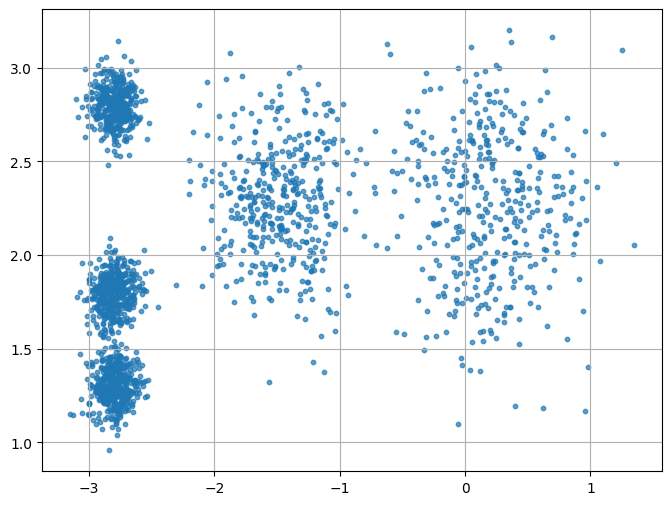

In [1]:
# 데이터 불러오기
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2, 2.3], [-1.5 , 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,random_state=7)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.grid(True)
plt.show()

In [2]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X)
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [3]:
y_pred is kmeans.labels_

True

In [4]:
# K-Means 알고리즘이 찾은 centroid 5개 확인
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [5]:
# 새로운 데이터에 대한 클러스터 할당
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

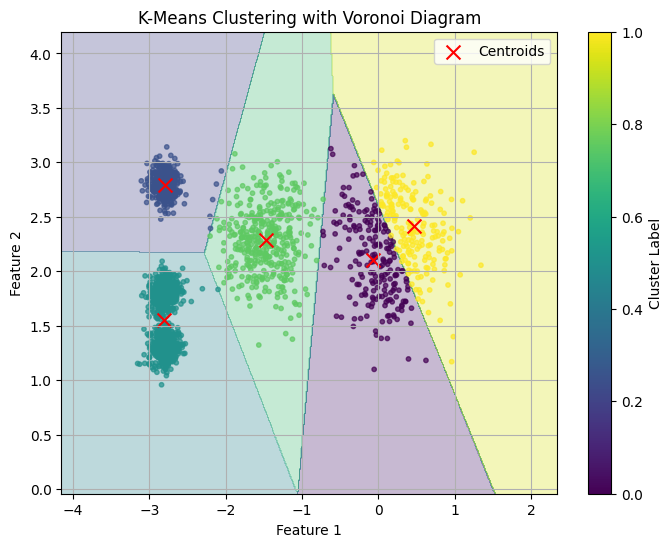

In [6]:
# 보로노이 다이어그램 생성 함수
def plot_voronoi(X, y_kmeans, centers):
    plt.figure(figsize=(8, 6))

    # 보로노이 다이어그램 그리기
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 보로노이 영역을 색으로 표시
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

    # 데이터 포인트를 그리기
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=10, alpha=0.7)

    # 센트로이드 표시 (x로 표시)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='x', label="Centroids")

    # 기타 시각화 설정
    plt.title("K-Means Clustering with Voronoi Diagram")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.legend()
    plt.show()

# 보로노이 다이어그램 및 클러스터 시각화
plot_voronoi(X, y_pred, kmeans.cluster_centers_)

In [7]:
# transform() 메서드 : 샘플과 각 센트로이드 사이의 거리 반환
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

**K-평균 알고리즘 작동 원리**

![k-means](https://velog.velcdn.com/images/eunhyuk1220/post/65a9ef14-7ea1-4575-8fcf-5b75fb692978/image.png)

- 센트로이드 랜덤 초기화 > 샘플에 레이블 할당 > 센트로이드 업데이트 > 샘플에 다시 레이블 할당 (반복)

k-평균 알고리즘은 수렴하는 것을 보장하지만 센트로이드 초기화에 따라 적절한 솔루션으로 수렴하지 못 할 수 있음 (지역 최적점으로 수렴할 가능성)

![centroid init](https://blog.kakaocdn.net/dn/znaZ2/btqU52p58Ig/RNTXPflUEGDmacREMFjfWK/img.png)

#### **센트로이드 초기화 방법**

- 센트로이드 위치를 근사하게 알 수 있는 경우, init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init = 1 설정 가능
- 랜덤 초기화를 다르게 하여 알고리즘을 여러번 수행하고 가장 좋은 솔루션을 선택
    - n_init 으로 랜덤 초기화 횟수 조절 (default : 10)


**이너셔 (inertia)**

- 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
- KMeans 클래스는 알고리즘을 n_init번 실행하여 이너셔가 가장 낮은 모델을 반환

In [8]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [9]:
# inertia_ 인스턴스 변수로 모델의 이너셔 확인 가능
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

211.59853725816828

In [10]:
# score() 메서드 : 이너셔의 "음숫값" 반환
# 예측기의 score() 메서드는 큰 값이 좋다는 규칙을 따라야하므로
kmeans.score(X)

-211.59853725816828

**k-평균++ 알고리즘**

- 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계 소개
- k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤
- 최적의 솔루션을 찾기 위해 실행할 알고리즘 반복 횟수를 크게 줄일 수 있으므로 초기화 단계에 드는 추가 계산이 가치가 있음을 보임

 ![k++](https://user-images.githubusercontent.com/37107740/189886873-5539ca2d-7b70-4588-9bfa-c4e0d7447975.png)

#### **k-평균 속도 개선과 미니배치 k-평균**

k-평균 속도 개선
- 삼각 부등식을 활용하여 알고리즘의 속도를 높임
- 샘플과 센트로이드 사이의 거리를 위한 상한선, 하한선을 유지

미니배치 k-평균
- 전체 데이터셋을 사용해 반복하지 않고, 반복마다 미니배치를 사용하여 센트로이드를 조금씩 이동함
- 알고리즘의 속도를 3~4배 높임

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

![init](https://blog.kakaocdn.net/dn/RBKlP/btqWn1oh1kN/YA9jUl3F44Lg3HgVHSK6v1/img.png)

미니배치 k-평균 알고리즘은 일반 k-평균 알고리즘보다 속도는 훨씬 빠름

<-> 이너셔는 일반적으로 더 나쁨, 특히 클러스터의 개수가 증가할 경우 차이가 커짐

#### **최적의 클러스터 개수 찾기**

- 이너셔 그래프를 그려 그래프가 느리게 감소하기 시작하는 '엘보'를 클러스터의 개수로 선정

 ![elbow](https://github.com/romanticq/romanticq.github.io/blob/master/assets/images/handson-chap9/kmeans4.png?raw=true)

- **실루엣 점수**를 통해 더 정확한 결론을 도출할 수 있음

**실루엣 점수 (silhouette score)**

- 모든 샘플에 대한 **실루엣 계수(silhouette coefficient)**의 평균
- 샘플의 실루엣 계수 : $(b-a)/max(a,b)$
    - a : 동일한 클러스터에 있는 다른 샘플까지의 평균 거리 (클러스터 내부의 평균 거리)
    - b : 가장 가까운 클러스터까지의 평균 거리 (가장 가까운 클러스터의 샘플까지 평균 거리)
    - -1 ~ +1 사이의 값을 가짐
    - +1 : 자신의 클러스터 안에 잘 속해있고 다른 클러스터와는 멀리 떨어져있다
    - 0 : 클러스터 경계에 위치해있다
    - -1 : 샘플이 잘못된 클러스터에 할당되었다
- 사이킷런의 silhouette_score() 함수를 통해 확인

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.655517642572828)

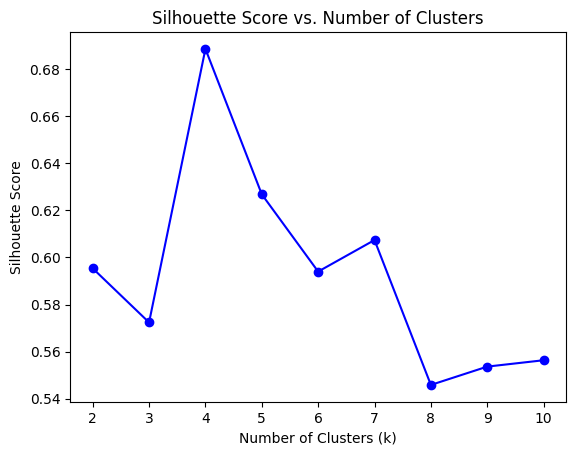

In [13]:
# k 값의 범위 설정 (1부터 10까지)
k_range = range(2, 11)  # k값은 최소 2부터 시작해야 합니다.
silhouette_scores = []

# 각 k값에 대해 KMeans 모델을 학습하고 실루엣 점수 계산
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 점수 그래프 그리기
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

**실루엣 다이어그램**
- 그래프의 높이(굵기) : 클러스터가 포함하고 있는 샘플의 개수
- 그래프의 너비 : 클러스터에 포함된 샘플의 실루엣 계수 (넓을수록 좋음)
- 수직 파선 : 각 클러스터 개수에 해당하는 실루엣 점수
    - 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가진다 (=많은 샘플이 파선의 왼쪽에서 멈춘다) : 클러스터의 샘플이 다른 클러스터랑 너무 가깝다, 나쁜 클러스터임

 ![silhouette diagram](https://github.com/romanticq/romanticq.github.io/blob/master/assets/images/handson-chap9/kmeans6.png?raw=true)

 - k=4, k=5 일 때의 클러스터가 좋으며, 특히 k=5일 때는 모든 클러스터의 크기가 비슷하므로 k=5를 선택하는 것이 좋음 (k=4일 때는 인덱스 0의 크기가 너무 큼)

### **K-평균 알고리즘의 한계**

- 최적이 아닌 솔루션을 피하기 위해서는 알고리즘을 여러 번 실행해야함
- 클러스터 개수를 지정해야 함
- 클러스터의 크기나 밀집도가 서로 다르거나, 원형이 아닐 경우 잘 작동하지 X

 ![k-mean limit](https://user-images.githubusercontent.com/37107740/190864923-916c0acb-77d7-4d64-8654-1d9870907d46.png)

(K-평균이 세 개의 타원형 클러스터를 적절히 구분하지 못 함)

-> K-평균 알고리즘을 실행하기 전 입력 특성의 스케일을 맞추는 것이 중요함


### **군집을 사용한 이미지 분할**

**이미지 분할 (image segmentation)**

- 이미지를 세그먼트 여러개로 분할하는 작업

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
from matplotlib.image import imread
image = plt.imread("/content/drive/MyDrive/Colab Notebooks/ESAA/25-1 OB/ladybug.png")
image.shape

(533, 800, 3)

In [16]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

(np.float64(-0.5), np.float64(799.5), np.float64(532.5), np.float64(-0.5))

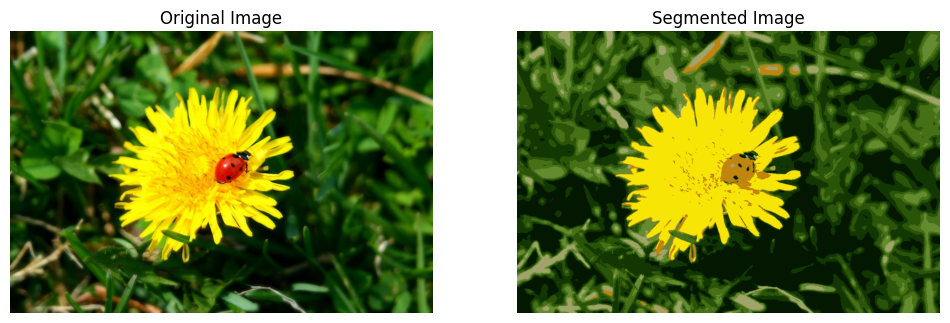

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원본이미지
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # 축 숨기기

# 8색상
axes[1].imshow(segmented_img)
axes[1].set_title('Segmented Image')
axes[1].axis('off')  # 축 숨기기

### **군집을 사용한 전처리**

군집은 차원 축소에 효과적인 방법
- 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용 가능!

In [18]:
# digits 데이터셋 (MNIST와 비슷)
# 0~9까지 숫자를 나타내는 8x8 크기 흑백 이미지 1,797개
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

In [19]:
# data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [20]:
# Training Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# 정확도 평가
log_reg.score(X_test, y_test)

0.96

**K-평균으로 전처리 후 재진행**

Step 1) 파이프라인을 만들어 훈련 세트를 50개의 클러스터로 모음

Step 2) 이미지를 50개 클러스터까지 거리로 바꿈

Step 3) 로지스틱 회귀 모델 적용

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([('kmeans', KMeans(n_clusters=50)),
                     ('log_reg', LogisticRegression())])
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [23]:
# 분류 파이프라인 평가
pipeline.score(X_test, y_test)

0.9555555555555556

**최적의 클러스터 개수 k 찾기**

- k-평균이 분류 파이프라인의 전처리 단계이므로 최적의 k값 찾기가 더 쉬움
    - 실루엣분석 / 이너셔 감소여부를 확인할 필요 X
    - 교차 검증에서 가장 좋은 분류 성능을 내는 k값이 최적의 값
    - GridSearchCV 사용

In [27]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=False)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=False)

In [28]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 40}
0.9488888888888889


### **군집을 사용한 준지도 학습**

레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

In [29]:
# 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [30]:
# 테스트 세트에서의 성능
log_reg.score(X_test, y_test)

0.8444444444444444

**개선 방안**

Step 1) 훈련 세트를 50개의 클러스터로 모음

Step 2) 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾음 (= 대표 이미지)

In [31]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

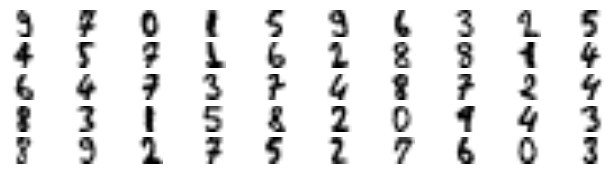

In [35]:
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [36]:
# 수동으로 레이블 할당
y_representative_digits = np.array([3,7,0,1,5,9,6,3,2,5,
                                    4,5,7,1,6,2,8,8,1,4,
                                    6,4,7,3,7,4,8,7,2,4,
                                    8,3,1,5,8,2,0,9,4,3,
                                    8,9,2,7,5,2,7,6,0,3])

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8888888888888888

성능 향상
- 무작위의 샘플에 레이블을 할당한 것이 아니라 각 클러스터를 대표하는 이미지에 레이블을 할당했기 때문!

**레이블 전파 (label propagation)**

- 대표 이미지의 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [39]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [41]:
# 모델 훈련 및 성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9022222222222223

센트로이드와 가까운 샘플의 20%에만 레이블 전파한 후 결과 확인
- 위의 레이블 전파는 대표 이미지의 레이블을 동일한 클러스터에 있는 "모든" 샘플로 전파했으므로 클러스터 경계에 가깝게 위치한 샘플까지 포함됨 >> 레이블이 잘못 부여되었을 확률이 큼

In [42]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [43]:
# 모델 훈련 및 성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9

In [44]:
# 실제로 전파된 레이블과 실제 레이블이 96% 일치
np.mean(y_train_partially_propagated == y_train[partially_propagated])

np.float64(0.9657534246575342)

#### **⭐능동 학습**

모델과 훈련 세트를 지속적으로 향상하기 위해 능동 학습을 몇 번 반복할 수 있음

전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공

**불확실성 샘플링**

Step 1) 지금까지 수집한 레이블된 샘플에서 모델을 훈련 > 이 모델을 사용하여 레이블되지 않은 모든 샘플에 대한 예측을 생성

Step 2) 모델이 가장 불확실하게 예측한 샘플(추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙임

Step 3) 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 반복

### **DBSCAN**

밀집된 연속적 지역을 클러스터로 정의하는 방법

- 알고리즘이 각 데이터마다 매우 작은 거리인 $\epsilon$ 내에 몇개의 다른 데이터가 함께 있는지 센다. 이 지역을 샘플의 **$\epsilon$-이웃**이라고 부름($\epsilon$-neighborhood)

- (자기 자신을 포함해) $\epsilon$-이웃 내에 적어도 min_samples개 데이터가 있다면 이 밀집된 지역에 있는 샘플을 **핵심 샘플 (Core-instance)**로 간주

- 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함
    - 이웃에는 다른 핵심 샘플이 포함될 수 있음 > 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터 형성

- 핵심 샘플도, neighborhood도 아닌 데이터는 이상치로 판단합니다.


💛*모든 클러스터가 충분히 밀집되어 있고, 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 냄*

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [46]:
# 샘플의 레이블은 인스턴스 변수 labels_에 저장됨
dbscan.labels_

array([ 0,  1,  2,  2,  2, -1,  2,  3,  2,  4,  1,  0,  5,  6,  2,  3,  5,
        0,  1, -1,  0,  1,  5,  0,  3,  0,  0,  2,  5,  2,  1,  5,  5,  1,
        5,  1,  1,  1,  4,  1,  1,  5,  1,  0,  2,  1,  5,  5, -1,  2,  1,
        0, -1,  3,  1,  1,  1,  5,  1,  1, -1,  1,  3,  1,  2,  1,  1,  5,
        5,  1,  5,  1,  2,  5,  1,  3,  2,  1,  5,  2,  5,  5,  2,  0,  2,
        5,  0,  5,  1,  1,  5,  1,  5,  5, -1,  1,  5,  1,  1,  1,  1,  0,
        1,  2,  1,  5,  1,  2,  1,  1,  2,  0,  5,  5,  1,  5,  5,  2,  1,
        1,  5,  0,  0,  1,  1,  1,  0,  2,  5,  2,  2,  5,  5,  5,  2,  1,
        1,  1,  2,  5,  5,  5,  5,  1,  2,  1,  1, -1, -1,  0,  1,  5, -1,
       -1,  1,  1,  1,  1,  0,  5, -1,  1,  2,  1,  0,  1,  5,  2,  5,  1,
        1,  5,  1,  2,  5,  5,  5,  5,  1,  5,  5,  1,  5,  1, -1,  2,  0,
        2,  2,  0,  1,  5,  1,  5,  5,  1, -1,  1,  1,  1,  0,  5,  1,  5,
        5,  0,  1,  1,  5,  5,  2,  1,  1,  5,  2, -1,  1,  5,  1,  5,  2,
        4,  5,  1,  5,  1

레이블이 -1이다 -> 알고리즘이 이 샘플을 이상치로 판단했다는 의미

In [48]:
# 핵심 샘플의 인덱스 : core_sample_indices_
print(len(dbscan.core_sample_indices_))
dbscan.core_sample_indices_

809


array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  15,  16,
        17,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        45,  47,  49,  50,  51,  54,  55,  56,  57,  58,  59,  61,  62,
        63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 129, 130, 133, 134, 135, 136,
       137, 138, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 154,
       155, 156, 157, 159, 161, 163, 164, 166, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 186, 187,
       189, 191, 192, 193, 194, 195, 197, 198, 199, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 214, 216, 217, 21

In [49]:
# 핵심 샘플 자체 : components_
dbscan.components_

array([[-0.79266984,  0.54406981],
       [-0.1056859 ,  0.9635256 ],
       [ 0.04203388,  0.28098332],
       ...,
       [-0.74769244,  0.66443677],
       [-0.27913216,  0.99654785],
       [ 0.36960816, -0.1874635 ]])

군집 결과

![DBSCAN](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FFzwHE%2FbtqWsHwSBBG%2FVWZPKAxLgH4kvU7itdFBHk%2Fimg.png)

- 클러스터를 7개 만들고 많은 샘플을 이상치로 판단함
- eps : 0.2로 증가시킨 결과 오른쪽과 같은 완벽한 군집을 얻음
    - eps : epsilon
    - eps 증가 시 샘플의 이웃 범위를 넓힘

*DBSCAN 유의할 점*

predict() 메서드 제공 X, only fit_predict() 메서드 제공

즉, 이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없음!!
- 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있기 때문
- 따라서 사용자가 필요한 예측기를 선택해야함

In [55]:
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [56]:
# knn_clf를 활용하여 클러스터 예측 수행
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [57]:
X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [58]:
knn.predict_proba(X_new)

array([[0.8 , 0.2 ],
       [0.  , 1.  ],
       [0.78, 0.22],
       [0.  , 1.  ]])

In [59]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

**장점**
- DBSCAN은 매우 간단하고 강력
- 클러스터의 모양이나 개수에 상관없이 감지할 수 있는 능력이 있으며, 이상치에 안정적이고 하이퍼파라미터 개수도 적음

**단점**
- 클러스터 간 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능

### **기타 군집 알고리즘**

- 병합 군집
- BIRCH
- 평균-이동
- 유사도 전파
- 스펙트럼 군집